In [3]:
from keras.datasets import mnist


In [4]:
from keras.utils import np_utils

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32') 
X_test = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')


X_train = X_train / 255
X_test = X_test / 255

In [6]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]


In [10]:
from keras.layers import Input,Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from keras.models import Model
import keras.backend as K

In [11]:
from keras.callbacks import TensorBoard

In [15]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1,
                          write_graph=True, write_images=False)

In [12]:
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_1 = Conv2D(64,(3,3),activation = 'relu')(input_layer)
pooling_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
dropout_1 = Dropout(0.25)(pooling_1)
conv_2 = Conv2D(64,(3,3),activation = 'relu')(dropout_1)
dropout_2 = Dropout(0.25)(conv_2)
flat_1 = Flatten()(dropout_2)
fcl_1 = Dense(64,activation = 'relu')(flat_1)
dropout_3 = Dropout(0.25)(fcl_1)
fcl_2 = Dense(64,activation = 'relu')(dropout_3)
dropout_4 = Dropout(0.25)(fcl_2)
res = Dense(10,activation = 'softmax')(dropout_4)
model = Model(inputs=input_layer,outputs = res)

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

(60000, 28, 28, 1)

In [16]:
batch_size = 128
num_epoch = 3
#model training
model_log = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test), callbacks =[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 120s 2ms/step - loss: 0.3327 - acc: 0.8974 - val_loss: 0.0566 - val_acc: 0.9827
Epoch 2/3
60000/60000 [==============================] - 121s 2ms/step - loss: 0.1030 - acc: 0.9713 - val_loss: 0.0376 - val_acc: 0.9879
Epoch 3/3
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0753 - acc: 0.9790 - val_loss: 0.0420 - val_acc: 0.9872


In [18]:
layer_outputs = [layer.output for layer in model]

TypeError: 'Model' object is not iterable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
model.layers

In [27]:
activation_layer = [layer.output for layer in model.layers]

In [73]:
model.layers[4]

In [83]:
activation_model = Model(inputs = model.input, outputs = activation_layer[1])

In [175]:
test_idx = 0
test_image = X_test[test_idx,:,:].reshape(28,28)
test_train_image = X_test[test_idx,:,:].reshape(1,28,28,1)
activation_show = activation_model.predict(test_train_image)

In [176]:
activation_show.shape

(1, 26, 26, 64)

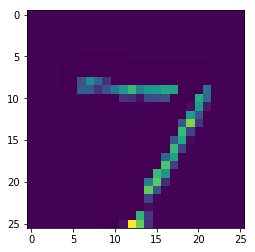

In [177]:
filter_index = 23
activation_showing = activation_show[:,:,:,filter_index].reshape(activation_show.shape[1],activation_show.shape[2])
plt.imshow(activation_showing)

In [116]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
__________

In [131]:
want_to_know = model.get_layer('dense_3').output

In [154]:
type(X_train[:1,:,:,:].tolist())

list

In [156]:
X_train[:1,:,:,:].shape

(1, 28, 28, 1)

In [157]:
test_func = K.function([model.input,K.learning_phase()],[want_to_know])

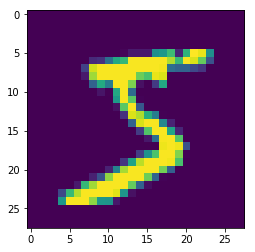

In [185]:
plt.imshow(X_train[:1,:,:,:].reshape(28,28))

In [181]:
test_func([X_train[:1,:,:,:],1])

[array([[1.30368025e-11, 5.17669407e-10, 1.09081777e-09, 3.54693434e-03,
         3.14603427e-10, 9.96450067e-01, 4.94111816e-07, 2.20384546e-08,
         1.82773886e-06, 7.00043813e-07]], dtype=float32)]